In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [70]:
## Looking at a small edge plot from ARA LiDAR

In [71]:
ara_edge = np.genfromtxt('/media/adam/data/PhD/ch3_lidarplot/ARA/070806_006_edge.asc', delimiter=' ')

In [72]:
ara_swath = np.genfromtxt('/media/adam/data/PhD/ch3_lidarplot/ARA/070806_006_subset.asc', delimiter=' ')

In [73]:
max(ara_swath[:,2])

14.961

In [74]:
len(ara_edge[:,2])

1839

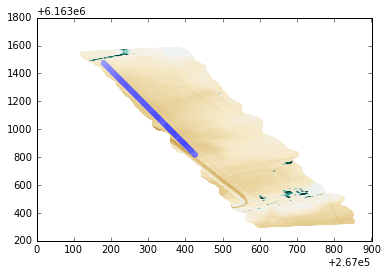

In [75]:
%matplotlib inline
plt.scatter(ara_swath[:,0], ara_swath[:,1],c=ara_swath[:,2], cmap = 'BrBG', vmin=0, vmax=10, edgecolors=None,lw=0)
plt.scatter(ara_edge[:,0], ara_edge[:,1],c=ara_edge[:,2], cmap = 'seismic', vmin=0, vmax=10, edgecolors=None,lw=0)


plt.show()

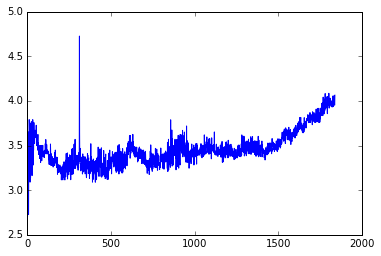

In [76]:

plt.figure()
plt.plot(ara_edge[:,2])


In [77]:
from scipy.interpolate import UnivariateSpline

In [92]:
fake_x_a = np.array(range(len(ara_edge[:,2])))

In [96]:
spl_a = UnivariateSpline(fake_x_a, ara_edge[:,2], k=5, s=10)

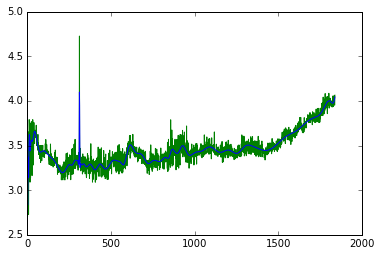

In [97]:
plt.plot(fake_x_a, ara_edge[:,2], 'g',fake_x_a, spl_a(fake_x_a), 'b')

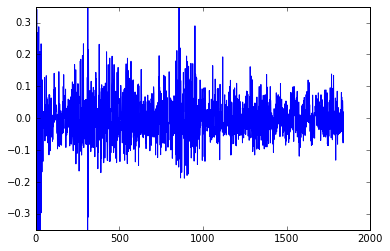

In [98]:
resids = ara_edge[:,2] - spl_a(fake_x_a)
plt.plot(resids)
plt.ylim([-0.35,0.35])
plt.show()

## compile a plot

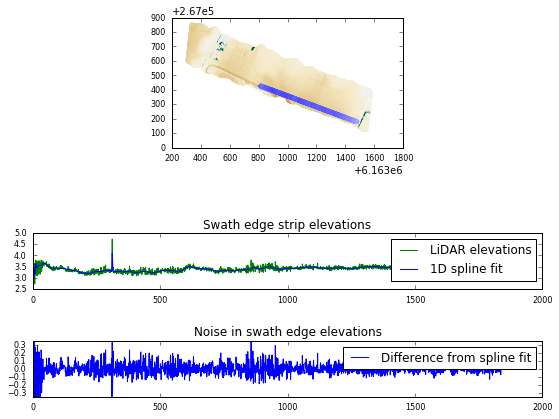

In [113]:
fig = plt.figure(figsize = ([20/2.54, 15/2.54]), dpi=300)
fig.subplots_adjust(top=0.85)

ax = fig.add_subplot(211)
ax.scatter(ara_swath[:,1], ara_swath[:,0],c=ara_swath[:,2], cmap = 'BrBG', vmin=0, vmax=10, edgecolors=None,lw=0)
ax.scatter(ara_edge[:,1], ara_edge[:,0],c=ara_edge[:,2], cmap = 'seismic', vmin=0, vmax=10, edgecolors=None,lw=0)
ax.set_aspect('equal')
ax.ticklabel_format( style='plain')
ax.tick_params(axis='x', pad=6, labelsize=8)
ax.tick_params(axis='y', pad=6, labelsize=8)
ax.get_xaxis().get_major_formatter().set_scientific(False)


ax1 = fig.add_subplot(413)
ax1.plot(fake_x_a, ara_edge[:,2], 'g', label='LiDAR elevations')
ax1.plot(fake_x_a, spl_a(fake_x_a), 'b', label='1D spline fit')
ax1.set_title('Swath edge strip elevations')
plt.legend()
ax1.get_legend()
ax1.ticklabel_format( style='sci', scilimits=(-2,5))
ax1.tick_params(axis='x', pad=6, labelsize=8)
ax1.tick_params(axis='y', pad=6, labelsize=8)

ax2 = fig.add_subplot(414)
ax2.plot(fake_x_a, ara_edge[:,2] - spl_a(fake_x_a), 'b', label='Difference from spline fit')
ax2.set_title('Noise in swath edge elevations')
plt.legend()
plt.ylim([-0.35,0.35])
ax2.get_legend()
ax2.tick_params(axis='x', pad=6, labelsize=8)
ax2.tick_params(axis='y', pad=6, labelsize=8)


#plt.suptitle('Swath edge noise from ARA flight 9, using ARA glider')
plt.tight_layout()

plt.savefig('ara2007.pdf', bbox_inches='tight')
plt.savefig('ara2007r.png', bbox_inches='tight')



In [100]:
rms_a = np.sqrt(np.mean(resids**2))
rms_a

0.073745393818150345

## Now for Hobart data, 2012

In [101]:
hob_edge = np.genfromtxt('/media/adam/data/PhD/ch3_lidarplot/APPLS_2012/line4_edge.asc', delimiter=' ')
hob_full = np.genfromtxt('/media/adam/data/PhD/ch3_lidarplot/APPLS_2012/line4_subset.asc', delimiter=' ')

In [102]:
fake_x = np.array(range(len(hob_edge[:,2])))
spl = UnivariateSpline(fake_x, hob_edge[:,2], k=5, s=30)

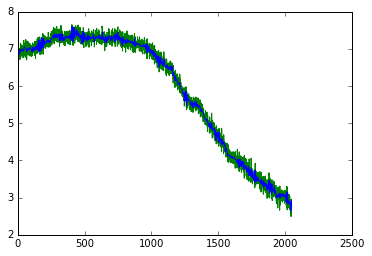

In [103]:
plt.plot(fake_x, hob_edge[:,2], 'g', fake_x, spl(fake_x), 'b')

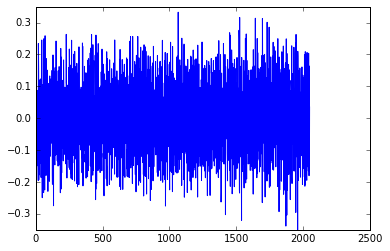

In [104]:
resids_h = hob_edge[:,2] - spl(fake_x)
plt.plot(resids_h)
plt.ylim([-0.35,0.35])
plt.show()

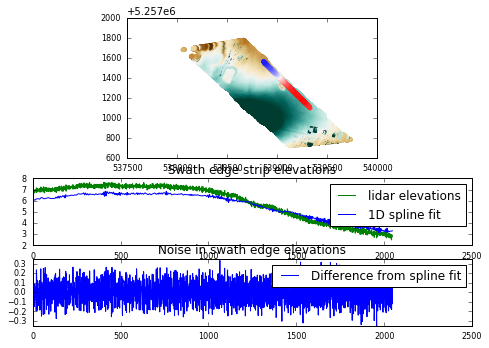

In [118]:
fig = plt.figure(figsize = ([20/2.54, 15/2.54]), dpi=300)
fig.subplots_adjust(top=0.85)

ax = fig.add_subplot(211)
ax.scatter(hob_full[:,0], hob_full[:,1],c=hob_full[:,2], cmap = 'BrBG', vmin=0, vmax=10, edgecolors=None,lw=0)
ax.scatter(hob_edge[:,0], hob_edge[:,1],c=hob_edge[:,2], cmap = 'seismic', vmin=0, vmax=10, edgecolors=None,lw=0)
ax.set_aspect('equal')
ax.ticklabel_format( style='sci', scilimits=(-2,7))
ax.tick_params(axis='x', pad=6, labelsize=8)
ax.tick_params(axis='y', pad=6, labelsize=8)

ax1 = fig.add_subplot(413)
ax1.plot(fake_x, hob_edge[:,2], 'g', label='lidar elevations')
ax1.plot(fake_x, spl(fake_x), 'b', label='1D spline fit')
ax1.set_title('Swath edge strip elevations')
plt.legend()
ax1.get_legend()
ax1.ticklabel_format( style='sci', scilimits=(-2,5))
ax1.tick_params(axis='x', pad=6, labelsize=8)
ax1.tick_params(axis='y', pad=6, labelsize=8)

ax2 = fig.add_subplot(414)
ax2.plot(fake_x, resids_h, 'b', label='Difference from spline fit')
ax2.set_title('Noise in swath edge elevations')
plt.legend()
plt.ylim([-0.35,0.35])
ax2.get_legend()
ax2.tick_params(axis='x', pad=6, labelsize=8)
ax2.tick_params(axis='y', pad=6, labelsize=8)

#plt.suptitle('Swath edge noise using SES1-AFO with a post-processed trajectory')
#plt.tight_layout()

plt.savefig('hob_pp_lidar.pdf', bbox_inches='tight')
plt.savefig('hob_pp_lidarr.png', bbox_inches='tight')

In [106]:
rms_h = np.sqrt(np.mean(resids**2))
rms_h

0.073745393818150345

## and again, with a raw LiDAR strip (no trajectory post processing)

In [114]:
raw_edge = np.genfromtxt('/media/adam/data/PhD/ch3_lidarplot/APPLS_2012/rawlas_edge.asc', delimiter=' ')
raw_full = np.genfromtxt('/media/adam/data/PhD/ch3_lidarplot/APPLS_2012/rawlas_subset.asc', delimiter=' ')

In [115]:
fake_x_r = np.array(range(len(raw_edge[:,2])))
spl = UnivariateSpline(fake_x_r, raw_edge[:,2], k=5, s=30)

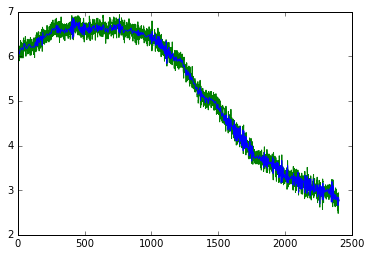

In [116]:
plt.plot(fake_x_r, raw_edge[:,2], 'g', fake_x_r, spl(fake_x_r), 'b')

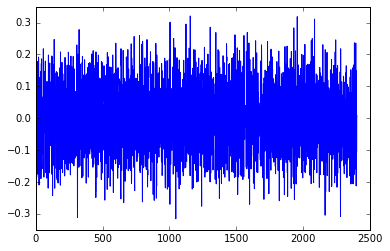

In [117]:
resids_r = raw_edge[:,2] - spl(fake_x_r)
plt.plot(resids_r)
plt.ylim([-0.35,0.35])
plt.show()

In [ ]:
fig = plt.figure(figsize = ([20/2.54, 15/2.54]), dpi=300)

ax = fig.add_subplot(211)
ax.scatter(raw_full[:,0], raw_full[:,1],c=raw_full[:,2], cmap = 'BrBG', vmin=0, vmax=10, edgecolors=None,lw=0)
ax.scatter(raw_edge[:,0], raw_edge[:,1],c=raw_edge[:,2], cmap = 'seismic', vmin=0, vmax=10, edgecolors=None,lw=0)
ax.set_aspect('equal')
ax.ticklabel_format( style='sci', scilimits=(-2,7))

ax1 = fig.add_subplot(413)
ax1.plot(fake_x_r, raw_edge[:,2], 'g', label='raw lidar elevations')
ax1.plot(fake_x_r, spl(fake_x_r), 'b', label='1D spline fit')

ax1.set_title('Swath edge strip elevations')
plt.legend()
ax1.get_legend()
ax1.ticklabel_format( style='sci', scilimits=(-2,5))

ax2 = fig.add_subplot(414)
ax2.plot(fake_x_r, resids_r, 'b', label='Difference from spline fit')
ax2.set_title('Noise in swath edge elevations')
plt.legend()
plt.ylim([-0.35,0.35])
ax2.get_legend()

plt.suptitle('Swath edge noise using SES1-AFO with a navigated trajectory')

plt.savefig('hob_raw_lidar.pdf', bbox_inches='tight')
plt.savefig('hob_raw_lidarr.png', bbox_inches='tight')

In [ ]:
rms_raw = np.sqrt(np.mean(resids**2))
rms_raw

In [ ]:
np.mean(resids)

In [ ]:
np.median(resids)

In [ ]:
this = set(raw_edge[:,0])
len(this)

In [ ]:
len(raw_edge[:,1])


In [ ]:
this = set(raw_edge[:,1])
len(this)

## UTAS oval

This sample is from a 2010 calibration flight. Aircraft positioned against HOB2 using TRACK, post-processed using OXTS dblended, and sampling UTAS oval. The real surface here varies in the order of 1 cm/m, so any variation between points of more than 5cm is very clearly instrument related noise.

In [107]:
oval_edge = np.genfromtxt('/media/adam/data/PhD/ch3_lidarplot/utas_oval_2010/hobartwithoffset_oval_strip.asc', delimiter=' ')
oval_full = np.genfromtxt('/media/adam/data/PhD/ch3_lidarplot/utas_oval_2010/hobartwithoffset_004 _utasoval.asc', delimiter=' ')

In [108]:
%matplotlib inline
from scipy.interpolate import UnivariateSpline

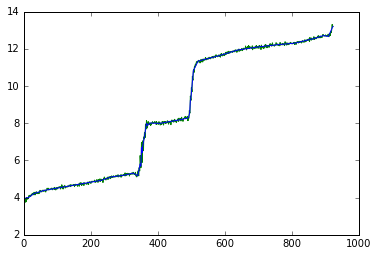

In [109]:
oval_x_r = np.array(range(len(oval_edge[:,2])))
spl_o = UnivariateSpline(oval_x_r, oval_edge[:,2], k=1, s=5)

plt.plot(oval_x_r, oval_edge[:,2], 'g', oval_x_r, spl_o(oval_x_r), 'b')

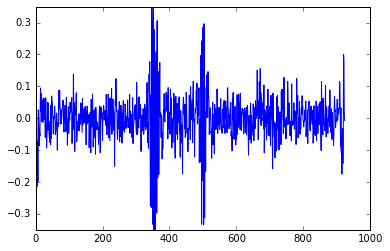

In [110]:
resids_o = oval_edge[:,2] - spl_o(oval_x_r)
plt.plot(resids_o)
plt.ylim([-0.35,0.35])
plt.show()

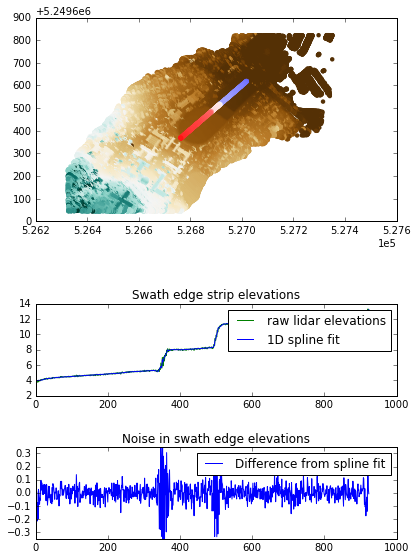

In [111]:

from matplotlib import gridspec

fig = plt.figure(figsize = ([15/2.54, 20/2.54]), dpi=300)


gs = gridspec.GridSpec(4, 1, wspace=0.2, hspace=0.5) 

ax = fig.add_subplot(211)
#ax = plt.subplot2grid((5,1), (0,0), rowspan=3, colspan=2)

#ax = plt.subplot(gs[0])

ax.scatter(oval_full[:,0], oval_full[:,1],c=oval_full[:,2], cmap = 'BrBG', vmin=4, vmax=80, edgecolors=None,lw=0)
ax.scatter(oval_edge[:,0], oval_edge[:,1],c=oval_edge[:,2], cmap = 'seismic', vmin=-5, vmax=20, edgecolors=None,lw=0)
#ax.set_aspect('equal')
ax.ticklabel_format( style='sci', scilimits=(0,4))

ax1 = fig.add_subplot(413)

#ax1 = plt.subplot(gs[2])
#ax1 = plt.subplot2grid((5,1), (3,0), rowspan=1, colspan=1)
ax1.plot(oval_x_r, oval_edge[:,2], 'g', label='raw lidar elevations')
ax1.plot(oval_x_r, spl_o(oval_x_r), 'b', label='1D spline fit')

ax1.set_title('Swath edge strip elevations')
plt.legend()
ax1.get_legend()
#ax1.ticklabel_format( style='sci', scilimits=(-2,5))

ax2 = fig.add_subplot(414)
#ax2 = plt.subplot(gs[3])
#ax2 = plt.subplot2grid((5,1), (4,0), rowspan=1, colspan=1)
ax2.plot(oval_x_r, resids_o, 'b', label='Difference from spline fit')
ax2.set_title('Noise in swath edge elevations')
plt.legend()
plt.ylim([-0.35,0.35])
ax2.get_legend()

#plt.suptitle('Swath centre noise from SES-AFO using a well controlled trajectory')
plt.tight_layout()
plt.savefig('utas_oval_raw_lidar.pdf', bbox_inches='tight')
plt.savefig('utas_oval_raw_lidarr.png', bbox_inches='tight')